In [28]:
# 資料加工、處理、分析函式庫
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 視覺化函式庫
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習函式庫
import sklearn

# 顯示到小數點後第3位
%precision 3

'%.3f'

#### 9-2-1 k-means法

目標：將給予的資料分類於類似性較高的群體。

實現步驟：
1. 繪製輸入資料。
2. 隨機繪製3個點。
3. 將各個隨機點標示為群體1、群體2、群體3的重心點。
4. 對於輸入資料的各個點，選擇3個重心點當中最接近的，並將它的編號設定為自己所屬的群體編號。
5. 對於所有的輸入資料都決定好群體編號之後，計算各個群體的重心（平均）。
6. 將step5所求得的重心設定為新的群體重心點。
7. 反覆進行step4到step6。但當達到反覆進行的上限次數，或是重心的移動距離變得非常小時，結束操作

#### 9-2-2 使用k-means法進行聚類分析

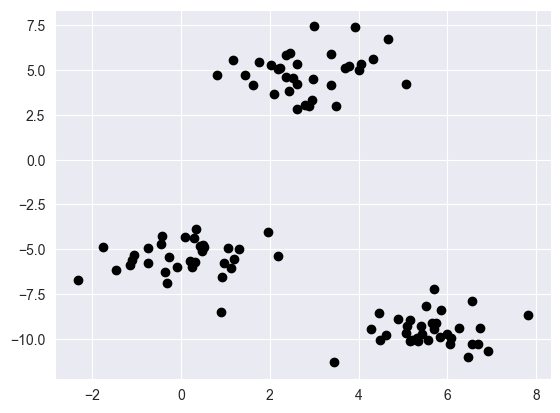

In [2]:
# 使用k-means法的匯入
from sklearn.cluster import KMeans

# 為了取得資料的匯入
from sklearn.datasets import make_blobs

# 生成範例資料
# 注意：由於make_blobs會回傳2個值，不用的那個以「_」來接收
X, _ = make_blobs(random_state = 10)

# 描繪圖形
# 能以color的參數著色
plt.scatter(X[:,0],X[:,1],color = 'black')

In [3]:
# KMeans類別的初始化
kmeans = KMeans(init = 'random',n_clusters = 3) # n_clusters設定群體的數量

# 計算群體的重心
kmeans.fit(X)

# 預測群體編號
y_pred = kmeans.predict(X)

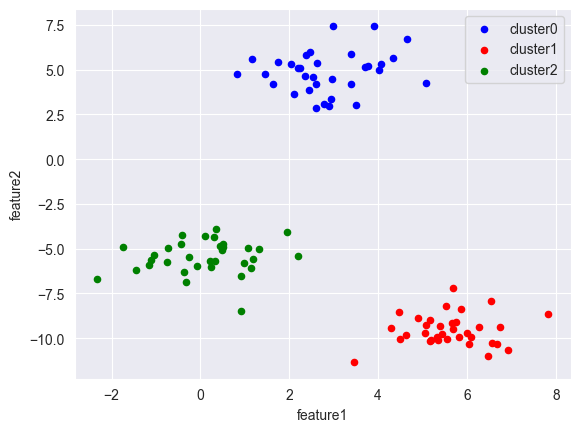

In [4]:
# 以concat來橫向結合資料（指定axis = 1)
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]),pd.DataFrame(y_pred)] ,axis = 1)


merge_data.columns = ['feature1','feature2','cluster']


ax = None
colors = ['blue','red','green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x = 'feature1', y = 'feature2', color = colors[i], label = f'cluster{i}', ax = ax)

In [7]:
import requests, zipfile
import io

# 指定有著資料的url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# 從url取得資料
r = requests.get(url,stream=True)

# 讀取zipfile並在當前目錄展開檔案
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [11]:
# 讀取對象資料
bank = pd.read_csv('bank-full.csv', sep = ';')

# 顯示開頭的5列
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
print('資料形式(X,y):{}'.format(bank.shape))
print('遺漏資料的數量:{}'.format(bank.isnull().sum().sum()))

資料形式(X,y):(45211, 17)
遺漏資料的數量:0


In [15]:
from sklearn.preprocessing import StandardScaler

# 過濾資料的行（欄位）
bank_sub = bank[['age','balance','campaign','previous']]

# 標準化處理
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


4    14734
0    24509
2     2684
1      221
5     1683
3     1380
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

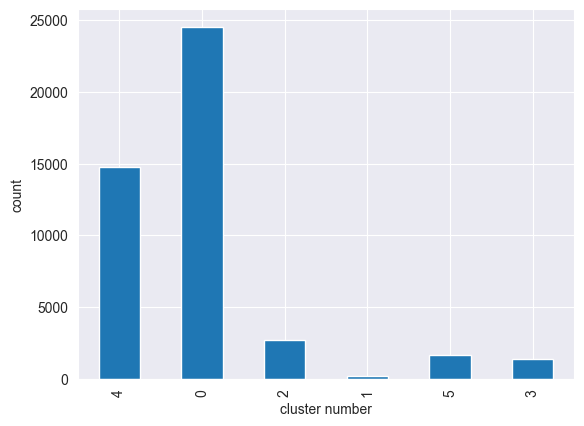

In [18]:
# KMeans類別的初始化
kmeans = KMeans(init = 'random', n_clusters = 6, random_state = 0)

# 計算群體的重心
kmeans.fit(bank_sub_std)

# 將群體編號轉換為pandas的Series物件
labels = pd.Series(kmeans.labels_, name = 'cluster_number')

# 顯示群體編號與件數
print(labels.value_counts(sort = False))

# 描繪圖形
ax = labels.value_counts(sort = False).plot(kind = 'bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

#### 9-2-4 使用手肘法判斷群數

Text(0, 0.5, 'Distortion')

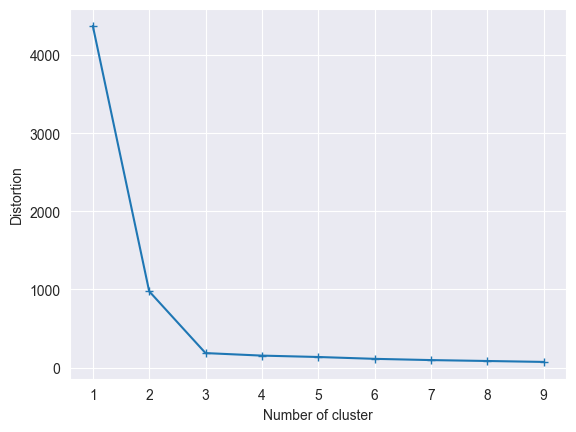

In [19]:
# 使用手肘法推論。讓群體數量從1到10逐漸增加，求得他們各自的距離總和
dist_list = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

# 顯示圖形
plt.plot(range(1,10), dist_list, marker = '+')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

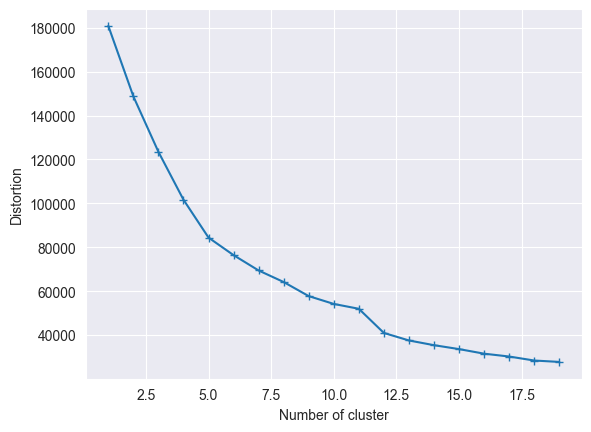

In [20]:
# 使用手肘法推論。讓群體數量從1到20逐漸增加，求得他們各自的距離總和
dist_list = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

# 顯示圖形
plt.plot(range(1,20), dist_list, marker = '+')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')

In [21]:
# 對金融機構的資料結合群體編號的資料
bank_with_cluster = pd.concat([bank, labels], axis = 1)

# 顯示開頭的5列
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [23]:
# 設定用於分割的區隔
bins = [15,20,25,30,35,40,45,50,55,60,65,100]

# 基於上述區隔來分割金融機構的資料，在qcut_age變數裡設定各資料的年齡層
qcut_age = pd.cut(bank_with_cluster.age, bins, right = False)

# 結合群體編號與年齡層
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis = 1)

# 以群體編號和年齡層為基準進行統計，將年齡層設定為行
cross_cluster_age = df.groupby(['cluster_number','age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,45,711,4024,8492,7146,4091,0,0,0,0,0
1,0,3,10,37,25,26,27,30,38,11,14
2,0,14,152,497,517,460,375,306,263,63,37
3,0,20,132,327,308,187,146,117,71,38,34
4,0,0,0,0,0,1155,4701,3885,3436,838,719
5,2,14,146,387,353,266,221,150,114,24,6


In [27]:
# 計算分割的資料數量
hist_age = pd.value_counts(qcut_age)
hist_age

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='cluster_number'>

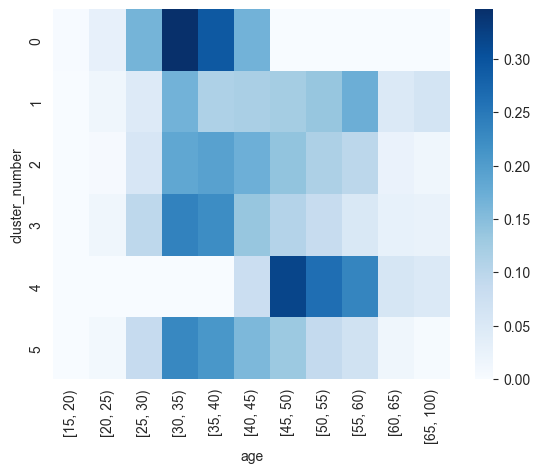

In [30]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(), axis = 1), cmap = 'Blues')

In [32]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number','job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3097,5610,728,426,5130,57,852,2564,813,4459,698,75
1,15,12,19,7,91,24,11,9,3,21,6,3
2,219,459,91,70,788,111,130,189,48,460,99,20
3,196,244,42,22,332,53,41,112,52,250,31,5
4,1467,3040,543,675,2732,1984,479,1124,4,2084,439,163
5,177,367,64,40,385,35,66,156,18,323,30,22


<AxesSubplot:xlabel='job', ylabel='cluster_number'>

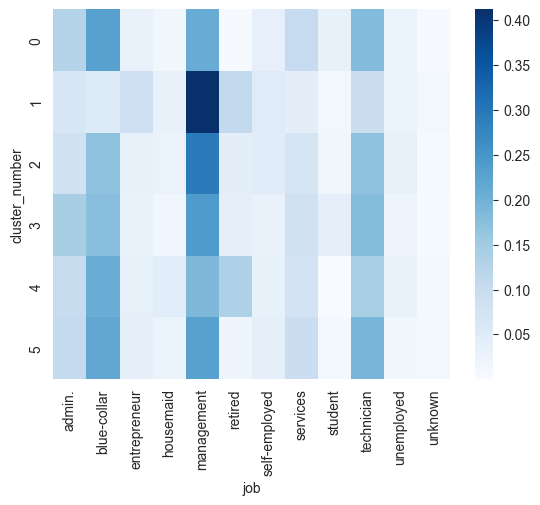

In [33]:
sns.heatmap(cross_cluster_job.apply(lambda x : x/x.sum(), axis = 1), cmap = 'Blues')

#### 9-2-6 k-means法以外的手法

聚類分析分為非階層型、階層型，也可分為軟式聚類分析、硬式聚類分析。

    軟式：計算屬於個群體的機率。
    硬式：對於每個資料給予獨一無二的群體編號。

#### 練習問題9-1

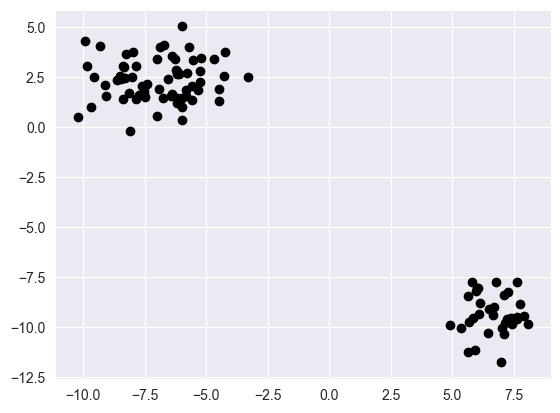

In [34]:
# 使用k-means法的匯入
from sklearn.cluster import KMeans

# 為了取得資料的匯入
from sklearn.datasets import make_blobs

# 生成範例資料
# 注意：由於make_blobs會回傳2個值，不用的那個以「_」來接收
X, _ = make_blobs(random_state = 52)

# 描繪圖形
# 能以color的參數著色
plt.scatter(X[:,0],X[:,1],color = 'black')

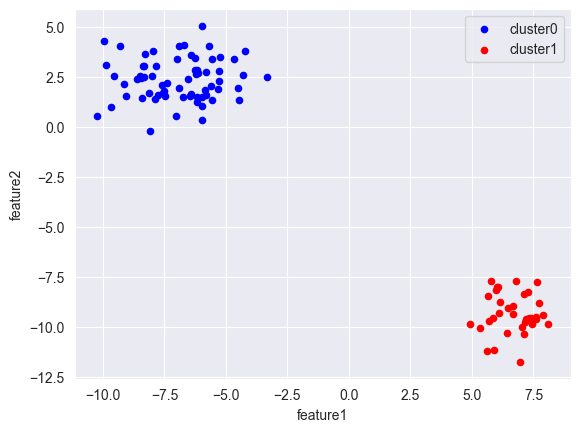

In [35]:
# KMeans類別的初始化
kmeans = KMeans(init='random', n_clusters=2)  # n_clusters設定群體的數量

# 計算群體的重心
kmeans.fit(X)

# 預測群體編號
y_pred = kmeans.predict(X)
# 以concat來橫向結合資料（指定axis = 1)
merge_data = pd.concat([pd.DataFrame(X[:, 0]), pd.DataFrame(X[:, 1]), pd.DataFrame(y_pred)], axis=1)

merge_data.columns = ['feature1', 'feature2', 'cluster']

ax = None
colors = ['blue', 'red']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster{i}', ax=ax)